In [155]:
#get data from Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#install packages
import pandas as pd
import numpy as np
import glob
import os

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity 
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import ward, dendrogram, fcluster

In [0]:
'''
Function "load" takes a .txt file as the parameter. It reads the .txt file, removes new line
indicators (\n), and returns the file as a string.
'''
def load(text):
    with open(text, encoding="ISO-8859-1") as f:
        my_text = f.read()
        lines = my_text.replace('\n',' ')
        return lines

In [0]:
'''
Function "read_txts" takes an os path as the parameter. It iterates through the
files in the given path and returns the filenames as a list.
'''
def read_txts(path):
    txt_files = []

    for filename in os.walk(path):
      f = filename
      txt_files.append(f)
                    
    return txt_files

In [0]:
#function to flatten list of lists
flatten = lambda l: [item for sublist in l for item in sublist]

In [0]:
#read in txt files
path = 'drive/My Drive/Colab Notebooks/txt'
text = read_txts(path) 

In [0]:
#reshape files
text2 = flatten(text)
text3 = text2[2:]
text4 = flatten(text3)

In [0]:
#subset files based on what models will run on
txt_files = text4[0:1650]

In [163]:
#sample of files
txt_files[1:5]

['G K Chesterton___Heretics.txt',
 'Lyman Frank Baum___Little Wizard Stories of Oz.txt',
 'Henry David Thoreau___Cape Cod.txt',
 'Andrew Lang___The Mark Of Cain.txt']

In [0]:
#Create list of unique authors
author_names = []
for i in range(len(txt_files)):
    string = txt_files[i]
    author_names.append(string[:string.index("_")])

In [0]:
#create dictionaries for distinct authors and their works
author_txt_df = pd.DataFrame({'author': author_names,'txts': txt_files})
author_txt_dict = author_txt_df.groupby('author')['txts'].apply(lambda g: g.values.tolist()).to_dict()

In [0]:
#extract .txt filenames for processing
txt_list = list(author_txt_dict.values())
final_txt_list = []

for i in range(len(author_txt_dict.keys())):
  final_txt_list.append(txt_list[i][0])

In [0]:
'''
Function read_sub is similar to function read_path. It takes an os path as its
parameter and returns the complete file paths from our subset of the files.
'''
def read_sub(path):
  txt_paths = []

  for txts in final_txt_list:
    subject_path = os.path.join(path,txts)
    txt_paths.append(subject_path)
    
  return txt_paths


In [0]:
#get file paths for vectorizer 
final_paths = read_sub(path)

In [0]:
#vectorize texts and compute their cosine distances
vectorizer = TfidfVectorizer(input = "filename")
dtm = vectorizer.fit_transform(final_paths) 
vocab = vectorizer.get_feature_names()
dtm = dtm.toarray()

cosdist = 1 - cosine_similarity(dtm)

names = list(author_txt_dict.keys())

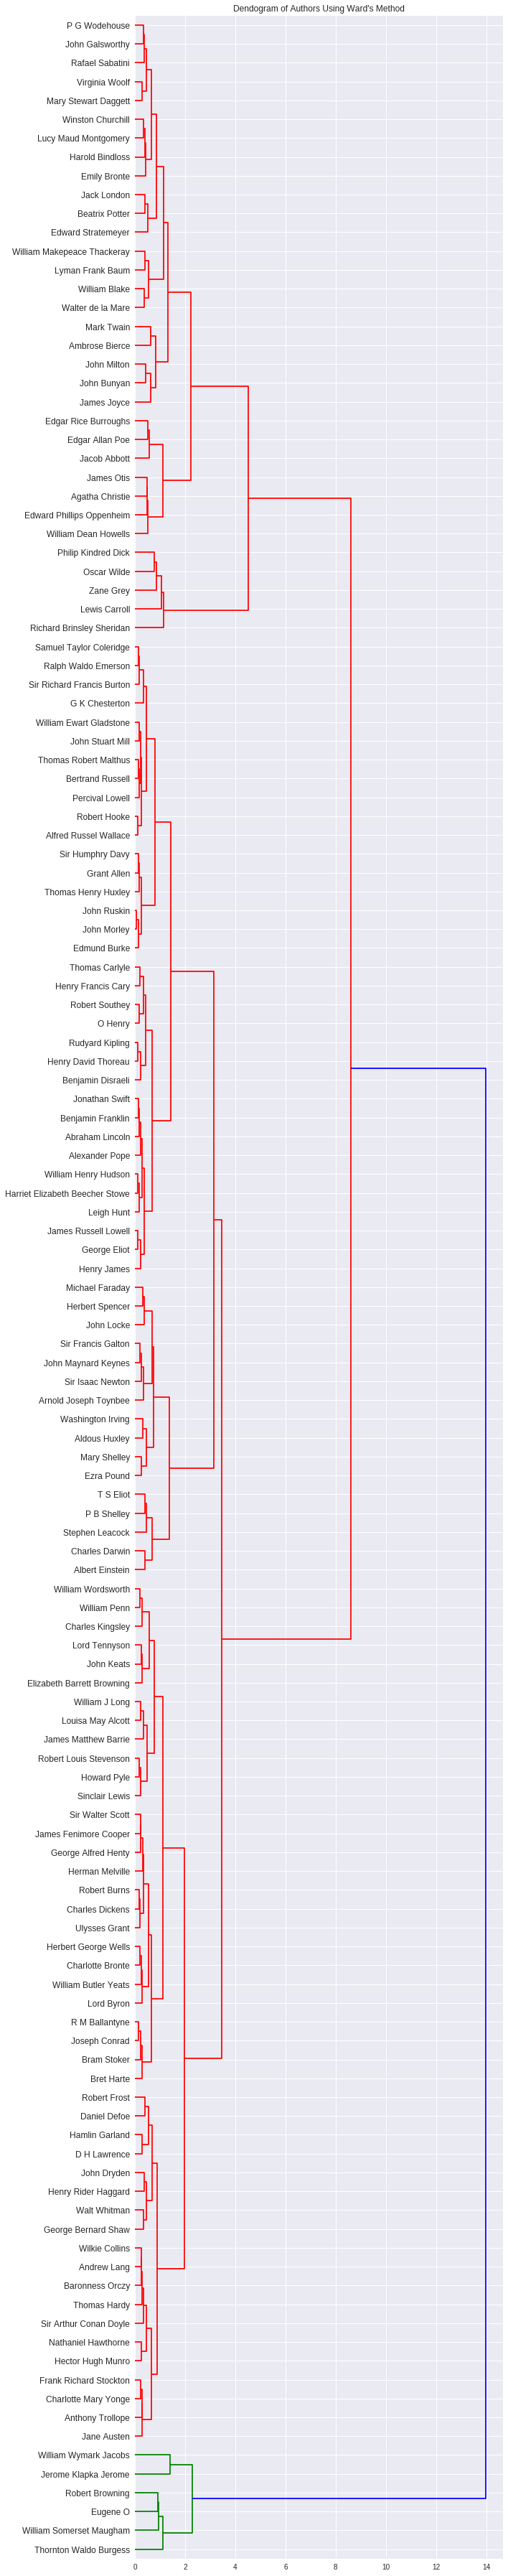

In [171]:
plt.figure(figsize=(10,50))

#Dendrogram with Ward's Method 
linkage_matrix = ward(cosdist)
dendrogram(linkage_matrix, orientation="right", labels=names, leaf_font_size=12)

plt.title("Dendogram of Authors Using Ward's Method")
plt.tight_layout()
plt.show()

In [0]:
#Find cluster assignments for authors
clusters = fcluster(linkage_matrix, 4, criterion='maxclust')
bins = clusters.tolist()

#Write dataframe out to CSV
author_bin_df = pd.DataFrame({'author': list(author_txt_dict.keys()),'bin': bins})
author_bin_df.to_csv('author_bin_df.csv', encoding='utf-8', index=False)